<a href="https://colab.research.google.com/github/DmitriiDenisov/mlcourse_dubai/blob/master/jupyter_notebooks/Lecture_04_Linear_Regression/topic-4-LinearRegressiob_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1. Basic data analysis with Pandas

In this task we will use [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data containing information about height and weight of 25 thousands teenagers.

**[1]. If you haven't installed yet Seaborn library you should execute *conda install seaborn* in the terminal. (Seaborn isn't part of Anaconda and it provides suitable high level functionality for data visualization).**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the data about height and weight into Pandas DataFrame:

In [5]:
data = pd.read_csv('../../data/weights_heights.csv', index_col='Index')

First thing you should do after reading the data is to look at first records. It helps to find the data reading errors (for example, when we have 1 column instead of 10 and it has 9 dots with commas in column name). Also it allows to take a closer look at the data and features and their nature (numerical, categorical, etc.).

Than we should plot histograms of feature distributions. Also it can help to understand features nature (power-series distribution or standard or something else). Histogram can help us find some values that aren't similar to each other - outliers.
It is convenient to plot histograms using *plot* method of Pandas DataFrame with option *kind='hist'*.

**Example.** Let's plot the histogram of teenager's height distribution. We use method *plot* for DataFrame *data* with options *y='Height'* (the feature which distribution we want to plot).

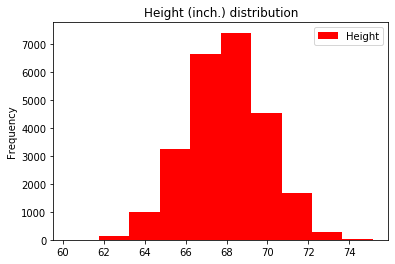

In [6]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution');

Options:

- *y='Height'* - the feature which distribution we want to plot
- *kind='hist'* - means that plot type is histogram
- *color='red'* - set color

**[2]. Look at the first 5 rows using *head* method of Pandas DataFrame. Plot the histogram of weight distribution using method *plot* Pandas DataFrame. Make the color of histogram to be green and add title.**

In [7]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


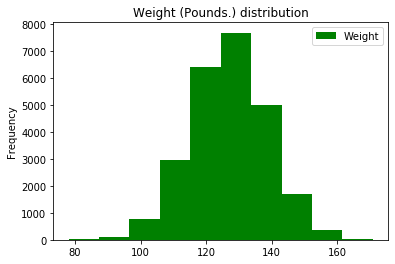

In [8]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (Pounds) distribution');

One of the most effective methods of basic data analysis is mapping pairwise dependencies of features. We make $m \times m$ plots (*m* is number of features) where we have histograms of feature distributions in diagonal and scatter plots of two feature dependencies outside. We can do this using $scatter\_matrix$ method of Pandas Data Frame or *pairplot* of Seaborn library. 

To illustrate this method we add third feature. Let's create *bodymass index* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). To do this we use *apply* method of Pandas FataFrame and Python's lambda functions.

In [9]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [10]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3]. Create the picture that contains pairwise dependencies of features 'Height', 'Weight' и 'BMI'. You should use *pairplot* method of Seaborn library.**

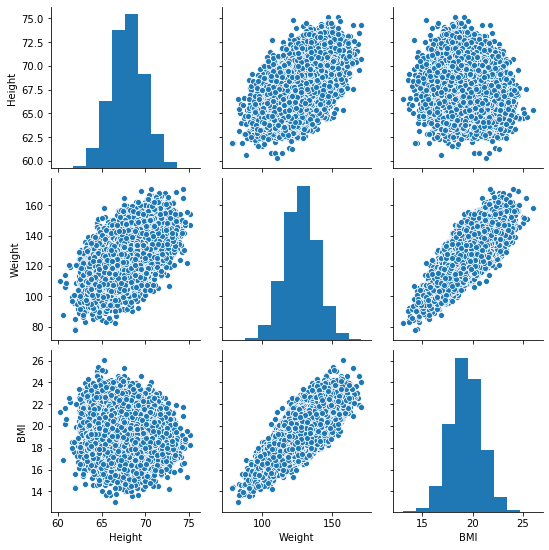

In [11]:
import seaborn as sns
sns.pairplot(data)

During the basic analysis you often have to investigate dependencies of numerical from categorical features (for example, dependency between salary and employee sex). In this case we can use boxplots from Seaborn library. Box plot is a compact way to show real value statistics (mean and quartiles) by different values of categorical feature. It also helps to find outliers - observations that have very different values from others.

**[4]. Create new feature *weight_category* in DataFrame *data* that will have 3 values: 1 if the weight is less than 120 pounds, 3 if the weight is greater or equal to 150 pounds, 2 in other cases. Create boxplot showing dependency between height and weight category. Use *boxplot* method of Seaborn library and *apply* method of Pandas DataFrame. Add titles "Height" to *y* axis and "Weight category" to *x* axis.**

In [ ]:
def weight_category(weight):
    if weight < 120:
        cat = 1
    elif weight>150:
        cat = 3
    else:
        cat = 2
    return cat

data['weight_cat'] = data['Weight'].apply(weight_category)

**[5]. Create scatter plot of dependencies between height and weight using *plot* method for Pandas DataFrame with option *kind='scatter'*. Add title to the figure.**

Text(0.5, 1.0, 'Weight and Height')

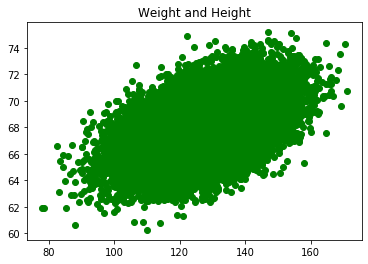

In [47]:
plt.scatter(x = data['Weight'], y = data['Height'], color = 'green')
plt.title('Weight and Height')

## Part 2. Squared Error Minimization

In basic case the task of real value prediction by other features (regression task) can be solved using squared error minimization.

**[6]. Create function computing squared error of dependency approximation between height $y$ and weight $x$ using straight line $y = w_0 + w_1 * x$ by two parameters $w_0$ and $w_1$:**
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Where $n$ is number of observations in dataset, $y_i$ and $x_i$ are height and weight of $i$th person in dataset. 

In [58]:
def squared_error(w1,w0,x,y):
    y_hat = w0 +w1*np.array(x)
    sqrd_err = np.square(np.subtract(np.array(y),y_hat)).sum()
    return sqrd_err


In [59]:
squared_error(x = data['Weight'], y = data['Height'], w0 = 1, w1 = 2)

888347706.9984975

So we are solving the task how to draw a straight line through the points cloud corresponding to observations in our dataset in space of features "Height" and "Weight" to minimize function[6]. Let's start with drawings some lines and make sure they transfer dependencies from height to weight.

**[7]. On plot from [5] Problem 1 draw two straight lines corresponding to values of parameters $w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$. Use *plot* method from *matplotlib.pyplot* and *linspace* method from NumPy library. Add the titles to axes and plot.**

In [50]:
x_min = data['Weight'].min()
x_max = data['Weight'].max()

y_min_1 = x_min*0.05+60
y_max_1 = x_max*0.05+60

y_min_2 = x_min*0.16+50
y_max_2 = x_max*0.16+50


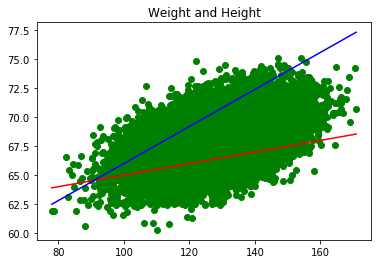

In [51]:
plt.scatter(x = data['Weight'], y = data['Height'], color = 'green')
plt.title('Weight and Height')
plt.plot([x_min, x_max], [y_min_1,y_max_1], c = 'r')
plt.plot([x_min, x_max], [y_min_2,y_max_2], c = 'b')

Squared error function minimization is very easy task because of the function's convex nature. There are many optimization methods for this problem. Let's look at dependency between error function and the first parameter (slope of the straight line) if the second parameter (absolute term) is fixed.

**[8]. Plot dependency between error function calculated in [6] and $w_1$ parameter when $w_0$ = 50. Add the titles to axes and plot.**

In [55]:
X = data['Weight']
Y = data['Height']
W0 = 50
w1_list = np.linspace(0,1,100).tolist()
sqrd_error_list =list()

for W1 in w1_list:
    #print(W1)
    sqrd_error_i = squared_error(x = X, y= Y, w0=W0, w1 =W1)
    #print(sqrd_error_i)
    sqrd_error_list.append(sqrd_error_i)



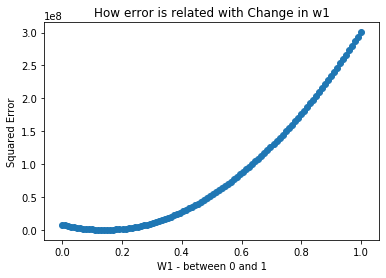

In [56]:
plt.scatter(w1_list, sqrd_error_list)
plt.title("How error is related with Change in w1")
plt.xlabel("W1 - between 0 and 1")
plt.ylabel("Squared Error")
plt.show()

Now we can find the slope of the straight line approximating dependency between height and weight when coefficient is fixed $w_0 = 50$ using optimization method.

**[9]. Using *minimize_scalar* method from *scipy.optimize* find the minimum of the function[6] for parameter value $w_1$ in range [-5,5]. Draw on plot [5] Problem 1 the straight line corresponding to the values of parameters ($w_0$, $w_1$) = (50, $w_1\_opt$) where $w_1\_opt$ is optimal value of parameter $w_1$ that was found in [8].**

In [61]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(squared_error, bounds = (-5,5),args = (50,X,Y))

w1_opt = res.x


Text(0, 0.5, 'Height (Inches)')

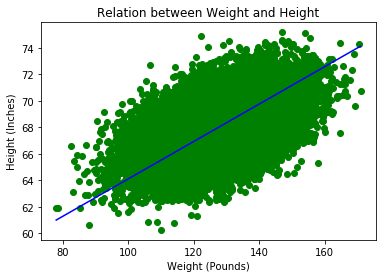

In [66]:
y_min_opt = x_min*w1_opt+50
y_max_opt = x_max*w1_opt+50

plt.scatter(x = data['Weight'], y = data['Height'], color = 'green')
plt.plot([x_min, x_max], [y_min_opt,y_max_opt], c = 'b')
plt.title('Relation between Weight and Height')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Height (Inches)')

When you analyze multidimensional data, you often want to get intuitive understanding about data nature using visualization. It is impossible to plot the data when you have more than 3 features. It is better to choose 2 or 3 principal components from data and represent them in plane or volume.

Let's have a look how Python can draw 3D figures on example of function $z(x,y) = sin(\sqrt{x^2+y^2})$ for values of $x$ и $y$ from interval [-5,5] with step 0.25

In [91]:
from mpl_toolkits.mplot3d import Axes3D

Create objects of type matplotlib.figure.Figure (picture) and  matplotlib.axes._subplots.Axes3DSubplot (axes). 

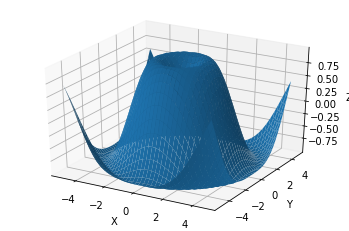

In [97]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Create NumPy arrays with data points on X and Y axes.
# Use meshgrid method creating matrix of coordinates
# By vectors of coordinates. Set needed function Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Finally use *plot_surface* method of type object
# Axes3DSubplot. Add titles to axes.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

(40, 40)

**[10]. Create 3D-plot between error function calculated in [6] and parameters $w_0$ and $w_1$. Add titles "Intercept" to the $x$ axis, "Slope" to the $y$ axis, "Error" to the $z$ axis.**

In [108]:
w0_array = np.linspace(-100,100,100)
w1_array = np.linspace(-5,5,100)

error_data = pd.DataFrame(columns = ['w0','w1','error'])
for W0 in w0_array:
    for W1 in w1_array:
        error= squared_error(w1 = W1, w0 = W0, x = X, y = Y)
        error_data = error_data.append({'w0':W0,'w1':W1,'error':error},ignore_index=True)

In [109]:
W1, W0 = np.meshgrid(w1_array,w0_array)

ERROR = np.array(error_data['error'])
ERROR = np.reshape(ERROR,(100,100))


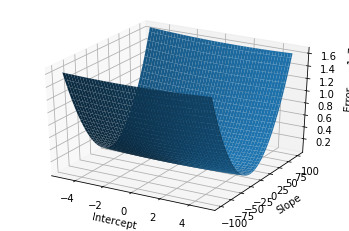

In [110]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W1, W0, ERROR)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11]. Find the minimum of the function in [6] using *minimize* method from scipy.optimize for parameters values $w_0$ in range [-100,100] and $w_1$ in range [-5, 5]. Starting point is ($w_0$, $w_1$) = (0, 0). Use L-BFGS-B optimization method (option method in minimize). Draw on plot from [5] Problem 1 the straight line coresponding finded optimal values of parameters $w_0$ and $w_1$. Add titles to the axes and plot.**

In [118]:
X = np.array(data['Weight'])
Y = np.array(data['Height'])
def squared_error(params, x, y):
    w1,w0 = params
    y_hat = w0 +w1*np.array(x)
    sqrd_err = np.square(np.subtract(np.array(y),y_hat)).sum()
    return sqrd_err


from scipy.optimize import minimize

res = minimize(squared_error, x0 = [0,0], bounds = [(-5,5),(-100,100)], method = 'L-BFGS-B', args = (X,Y))

optimal_val = res.x


Text(0, 0.5, 'Height (Inches)')

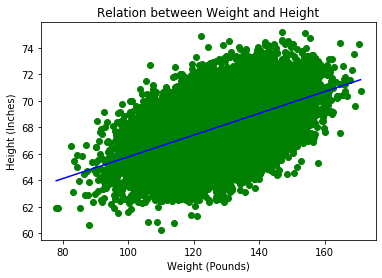

In [120]:
w0_opt = optimal_val[1]
w1_opt = optimal_val[0]

y_min_opt = x_min*w1_opt+w0_opt
y_max_opt = x_max*w1_opt+w0_opt

plt.scatter(x = data['Weight'], y = data['Height'], color = 'green')
plt.plot([x_min, x_max], [y_min_opt,y_max_opt], c = 'b')
plt.title('Relation between Weight and Height')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Height (Inches)')

In [119]:

optimal_val[1]

57.57178753255578